In [3]:


import numpy as np
import pandas as pd
pdf=pd.DataFrame
from matplotlib import pyplot as plt, cycler, rcParams
from matplotlib.lines import Line2D

from model.calculate_features import CalculateFeatures

In [4]:
dtypes = {'Magnitude': np.float64, 'Latitude': np.float64, 'Longitude': np.float64, 'Depth': np.float64}
df = pd.read_csv('../../data/DATA_3_south.csv', delimiter=',', dtype=dtypes, parse_dates=["Datetime"],
                 date_parser=np.datetime64)

df = df.reset_index(drop=True)

In [5]:
len(df.index)

39460

In [11]:
df

,Magnitude,Latitude,Longitude,Depth,Datetime
0,3.9,16.8023,-94.9130,114.9,2017-01-01 00:54:31
1,3.9,15.2842,-93.1210,100.7,2017-01-01 04:10:39
2,3.9,17.4503,-94.9543,138.3,2017-01-01 04:23:51
3,3.9,16.4077,-93.7075,139.4,2017-01-01 04:26:01
4,4.1,16.7017,-98.8633,27.5,2017-01-01 08:49:23
...,...,...,...,...,...
39455,4.3,16.8200,-100.8900,8.0,2021-05-29 13:59:14
39456,3.9,16.8100,-100.9600,12.0,2021-05-29 14:15:02
39457,4.2,16.7800,-100.8900,15.0,2021-05-29 16:09:39
39458,3.9,15.8700,-94.7100,15.0,2021-05-29 19:54:14


In [6]:
df_model = CalculateFeatures(df, 50, trimFeatures=False)
features = df_model.features
trim_features = df_model.get_trim_features()

In [7]:
df_selected = features
df_insight = pd.DataFrame()

df_selected.drop("old_index", axis=1, inplace=True)


In [8]:
import warnings

warnings.filterwarnings('ignore')
df_selected = features.drop(['firstT', 'lastT'], axis=1)
min_mag, max_mag = df_selected.maxMag.agg(['min', 'max'])

df_groups_to_render = []

def apply_the_thing(aggregate):
    df_insight_me = pd.DataFrame()
    df_insight_l = pd.DataFrame()
    for mag in np.arange(min_mag, max_mag+.1, .1).round(1):
        df_insight_me[mag] = df_selected[df_selected.next14dMaxMag > mag].apply(aggregate)
        df_insight_l[mag] = df_selected[df_selected.next14dMaxMag <= mag].apply(aggregate)
    return [df_insight_me,df_insight_l]

max=apply_the_thing(pdf.max)
min=apply_the_thing(pdf.min)
df_groups_to_render.append(["Minimum", *min])
df_groups_to_render.append(["Maximum", *max])
df_groups_to_render.append(["Mean", *apply_the_thing(pdf.mean)])
df_groups_to_render.append(["Variance", *apply_the_thing(pdf.var)])
df_groups_to_render.append(["sum", *apply_the_thing(pdf.sum)])
df_groups_to_render.append(["diff max min",max[0]-min[0],max[1]-min[1]])
df_groups_to_render.append(["mean diff",*apply_the_thing(lambda x:pdf.mean(pdf.diff(x)))])
df_groups_to_render.append(["max diff",*apply_the_thing(lambda x:pdf.max(pdf.diff(x)))])
df_groups_to_render.append(["min diff",*apply_the_thing(lambda x:pdf.min(pdf.diff(x)))])

In [9]:
def plot_relevant_features(df_groups_to_render):
    for group in df_groups_to_render:
        title=group[0]
        ax1=group[1]
        ax2=group[2]
        fig, axes = plt.subplots(nrows=len(ax1.T.columns), ncols=1, constrained_layout=True)
        fig.suptitle(title, fontsize=20)
        fig.set_size_inches(10, 32)
        CMAP_1 = plt.cm.Set1
        rcParams['axes.prop_cycle'] = cycler(color=CMAP_1(np.linspace(0, 1, len(ax1.T.columns))))
        custom_lines = [Line2D([0], [0], color=CMAP_1(0), lw=4),
                        Line2D([0], [0], color=CMAP_1(1), lw=4)
                        ]

        fig.legend(custom_lines, ['next14dMaxMag <= mag', 'next14dMaxMag > mag'], loc=(.4, .972))

        for i, column in enumerate(ax1.T.columns):
            if i == len(ax1.T.columns) - 1:
                ax1.T[column].plot(ax=axes[i], kind="line", label=str(i), title=column,
                                             xticks=ax1.columns[::2], color=CMAP_1(1))
                ax2.T[column].plot(ax=axes[i], label=str(i), kind="line", color=CMAP_1(0))
            elif i == 0:
                ax1.T[column].plot(ax=axes[i], kind="line", label=str(i), title=column,
                                             xticks=ax1.columns[::2], color=CMAP_1(1))
                ax2.T[column].plot(ax=axes[i], label=str(i), kind="line", color=CMAP_1(0))

                axes[i].xaxis.set_ticks_position('top')
            else:
                ax1.T[column].plot(ax=axes[i], kind="line", title=column, color=CMAP_1(1))
                ax2.T[column].plot(ax=axes[i], kind="line", color=CMAP_1(0))
                axes[i].tick_params(
                    axis='x',  # changes apply to the x-axis
                    which='both',  # both major and minor ticks are affected
                    bottom=False,  # ticks along the bottom edge are off
                    top=False,  # ticks along the top edge are off
                    labelbottom=False)  # labels along the bottom edge are off
                plt.rcParams['axes.titley'] = 1.0  # y is in axes-relative coordinates.
                plt.rcParams['axes.titlepad'] = -14  # pad is in points...
        plt.show()
        plt.clf()


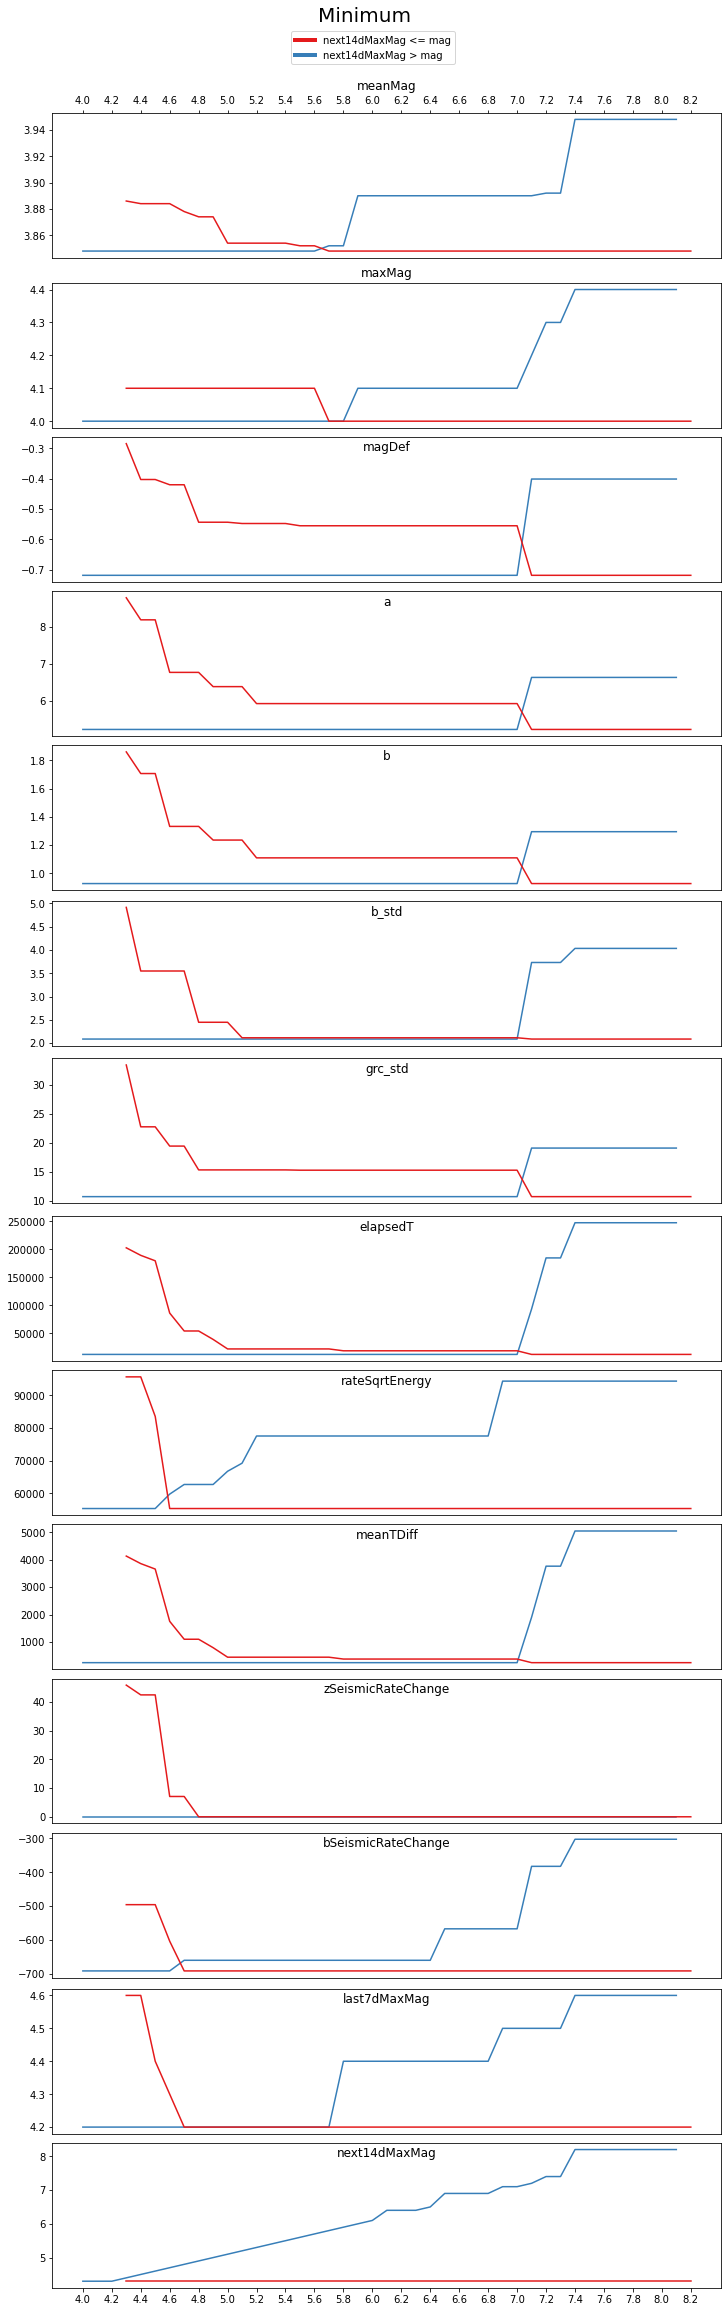

<Figure size 432x288 with 0 Axes>

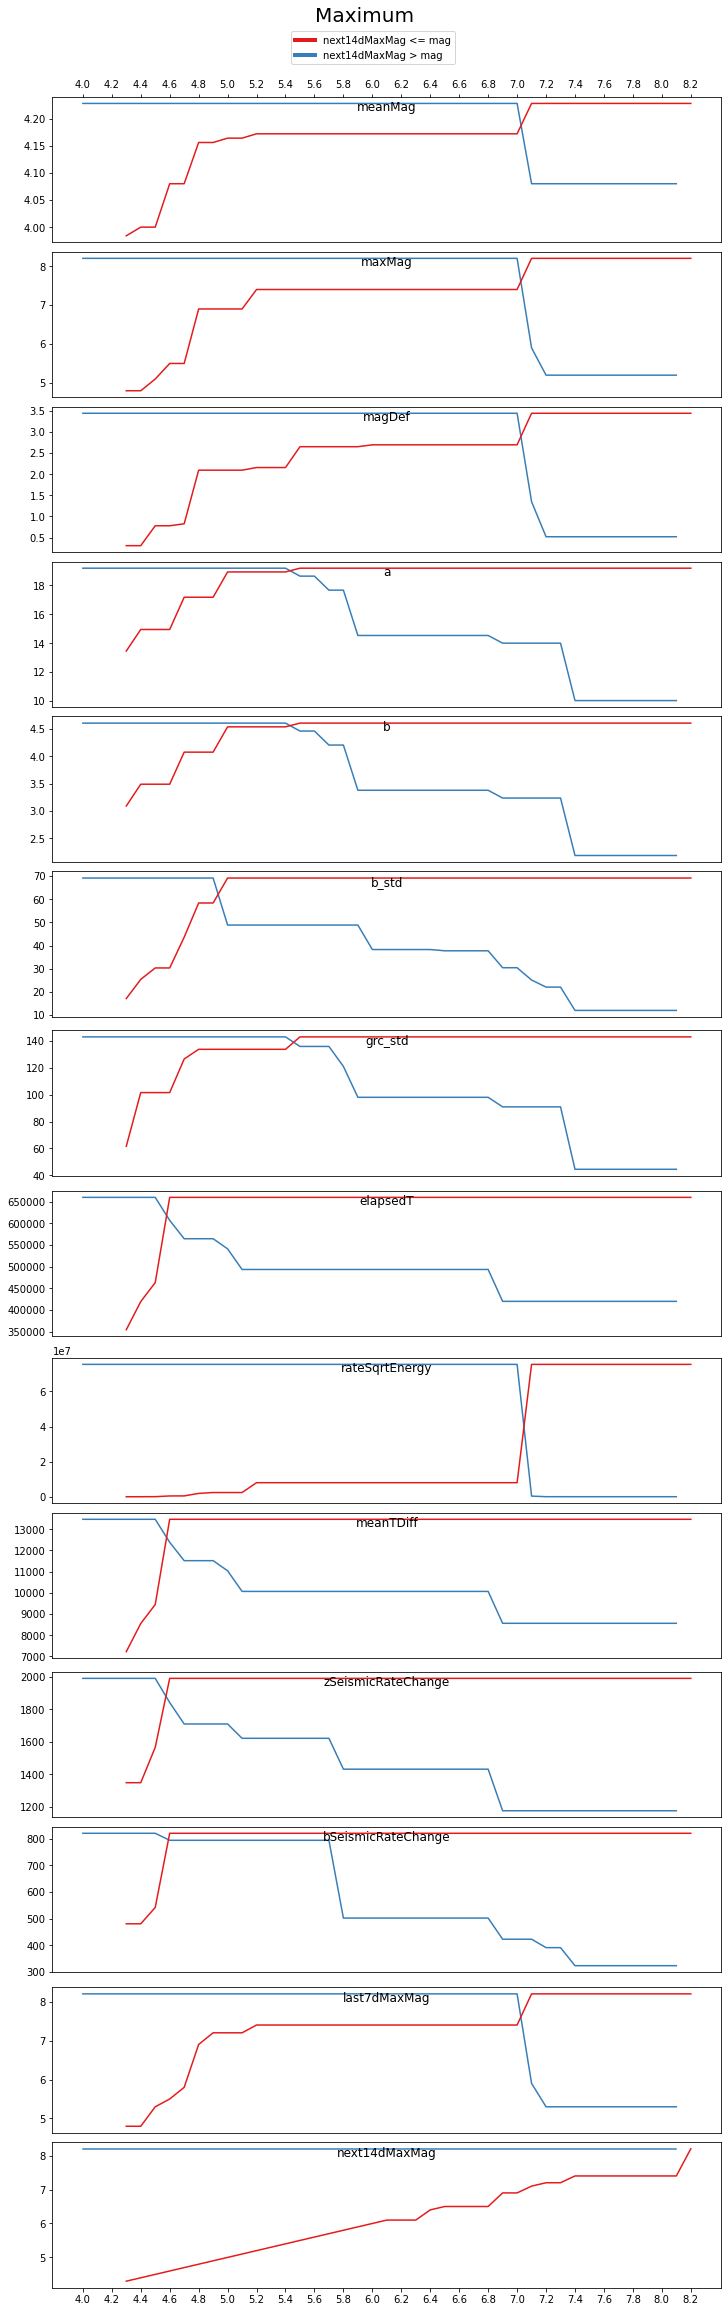

<Figure size 432x288 with 0 Axes>

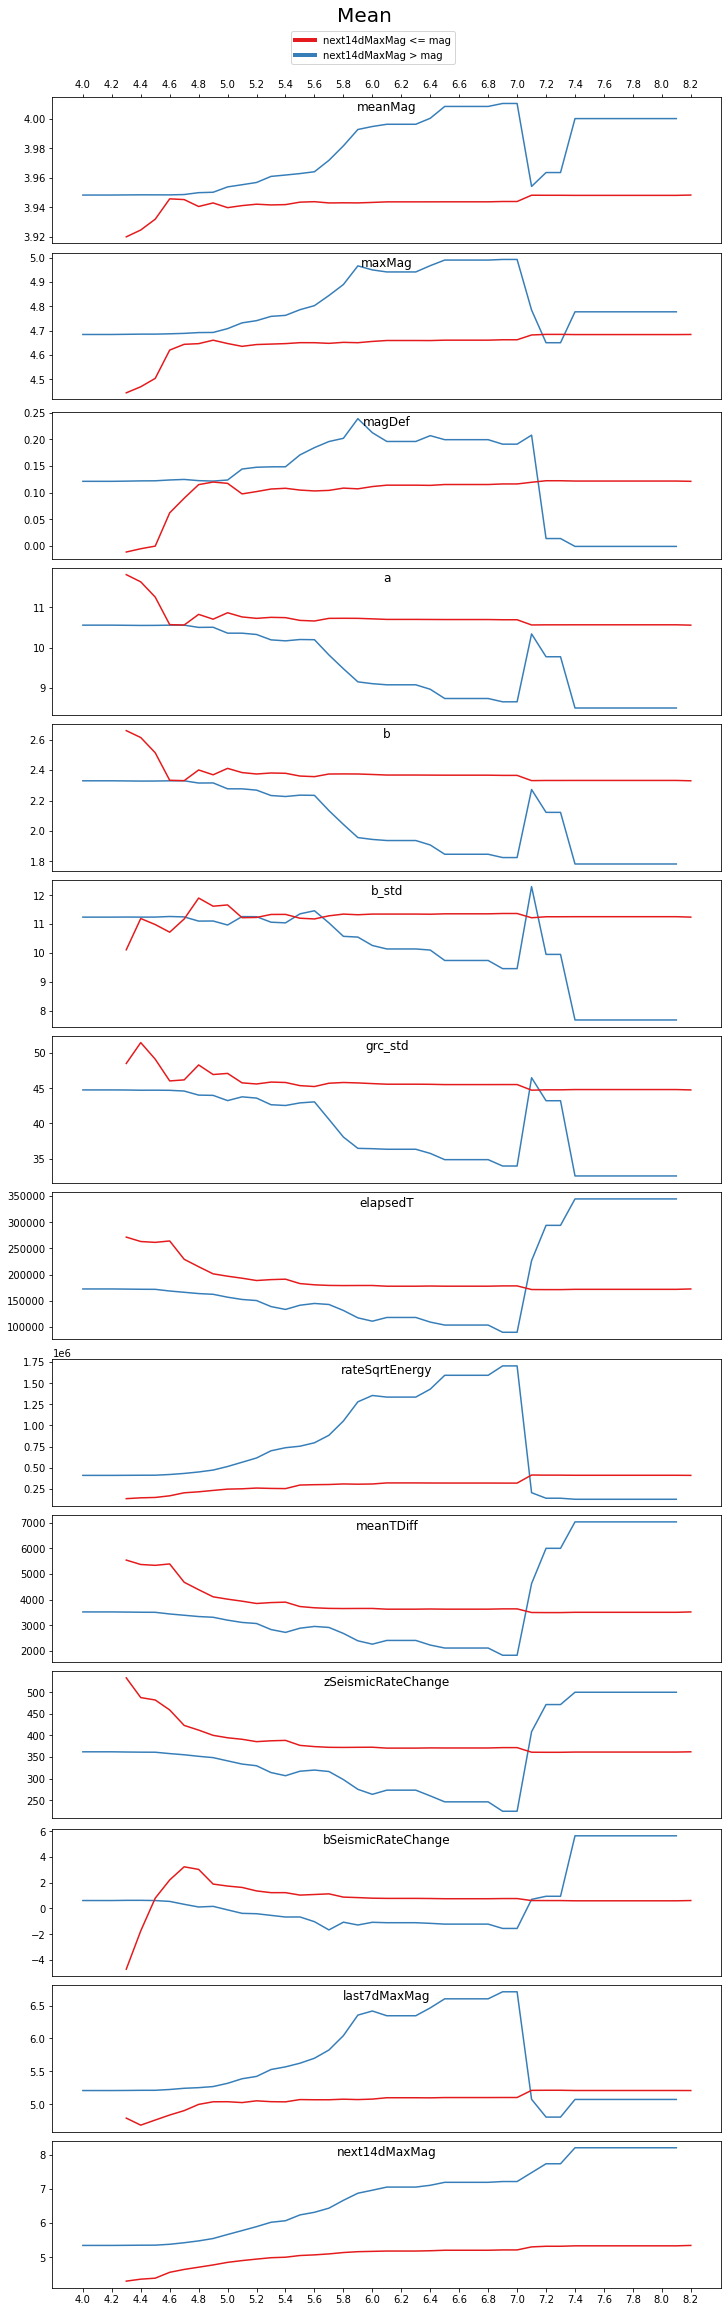

<Figure size 432x288 with 0 Axes>

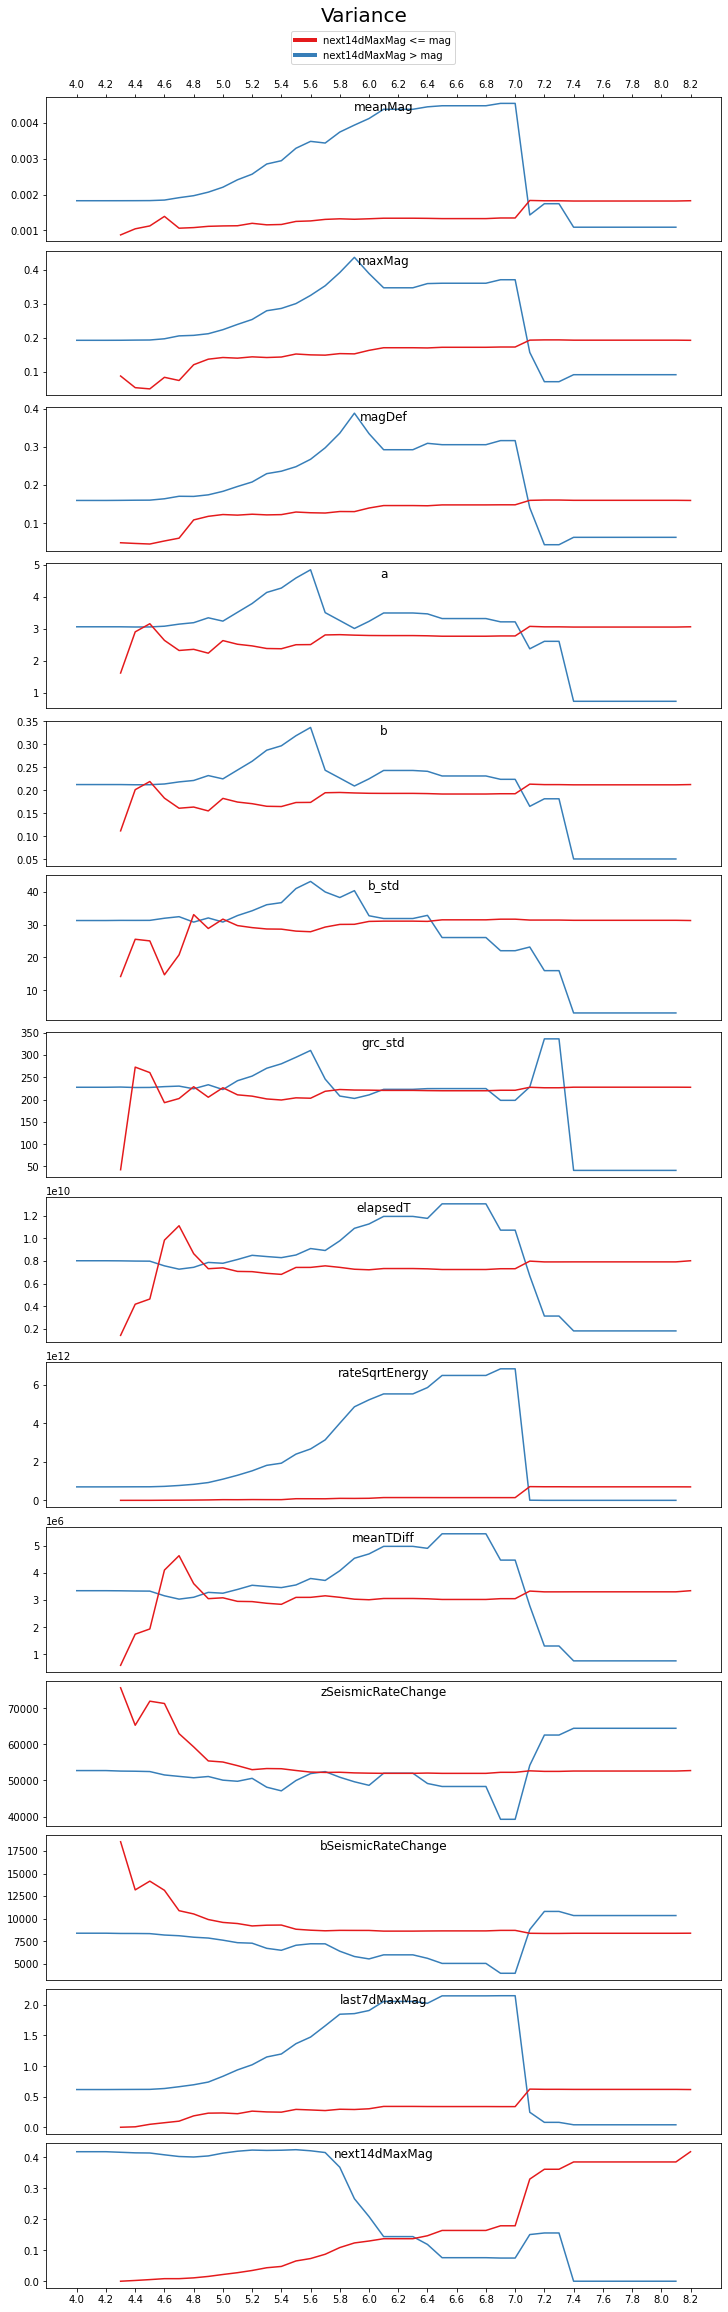

<Figure size 432x288 with 0 Axes>

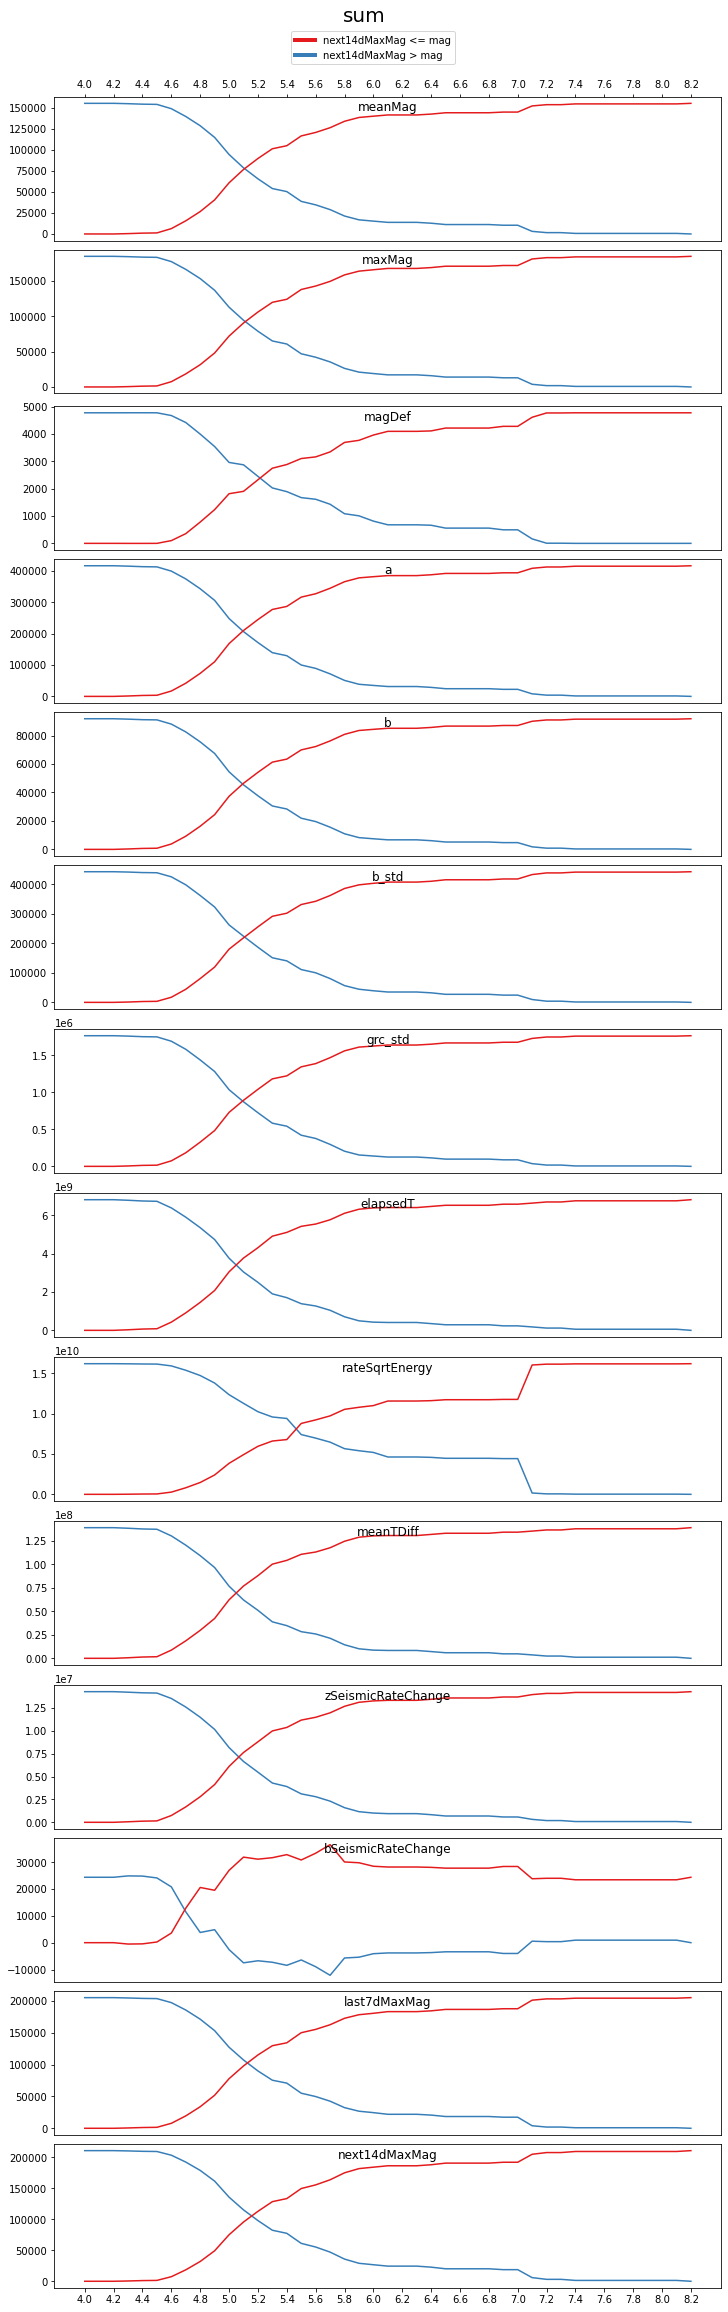

<Figure size 432x288 with 0 Axes>

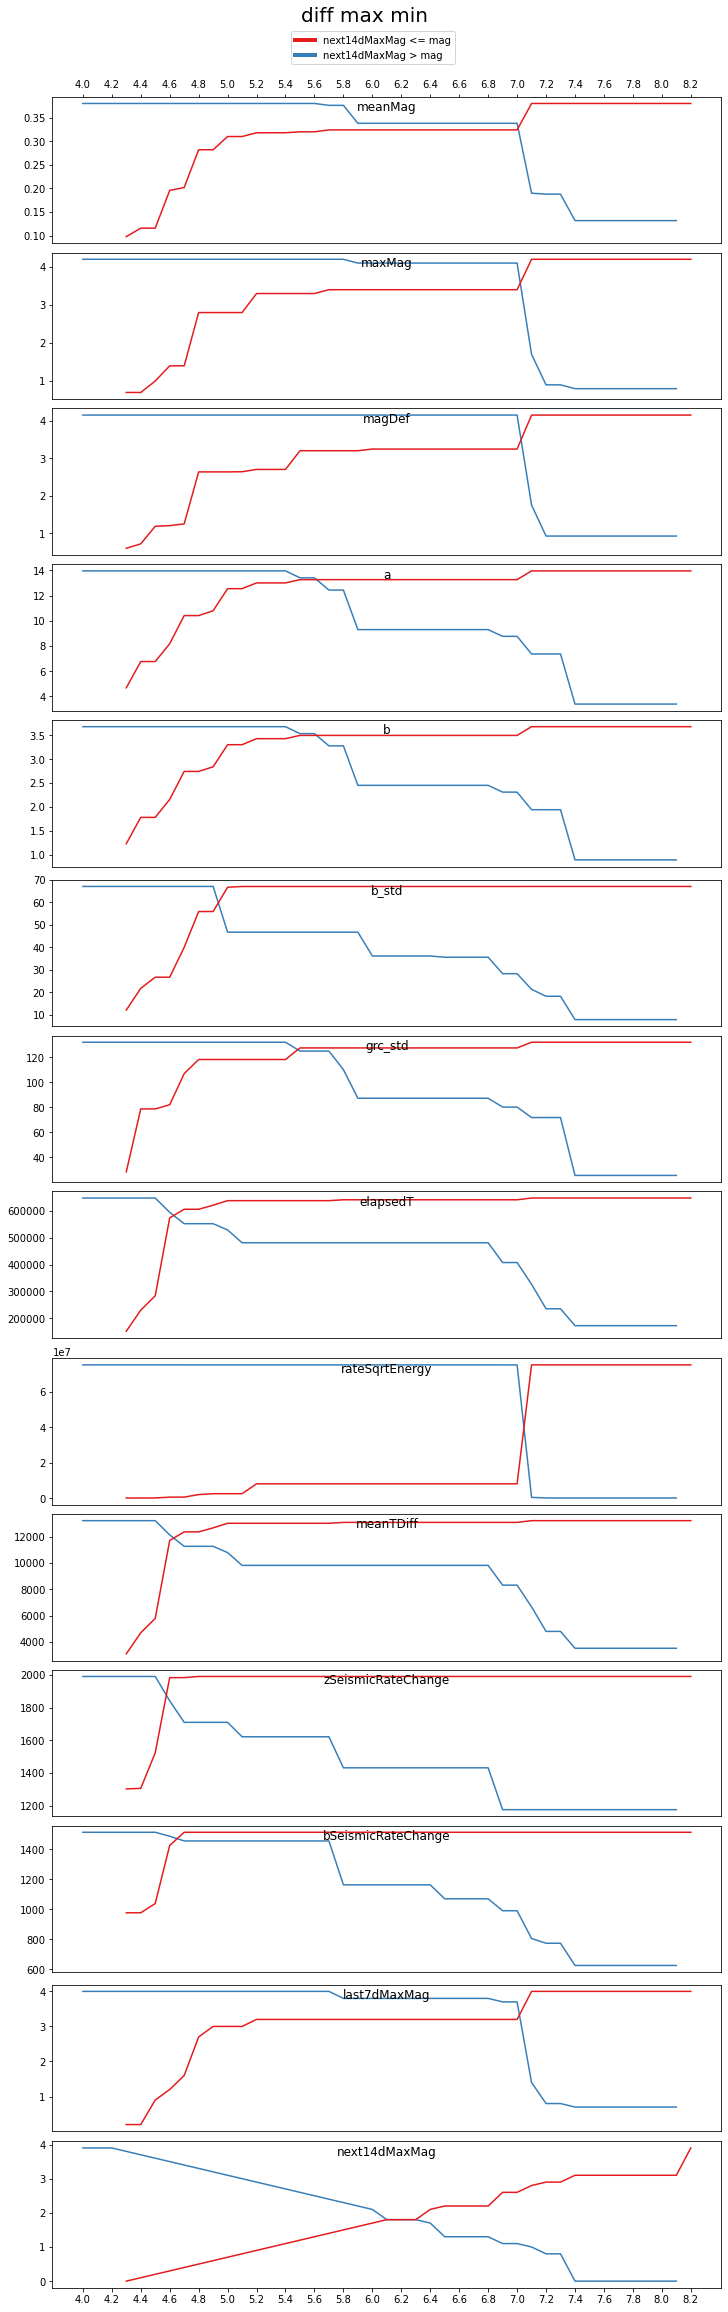

<Figure size 432x288 with 0 Axes>

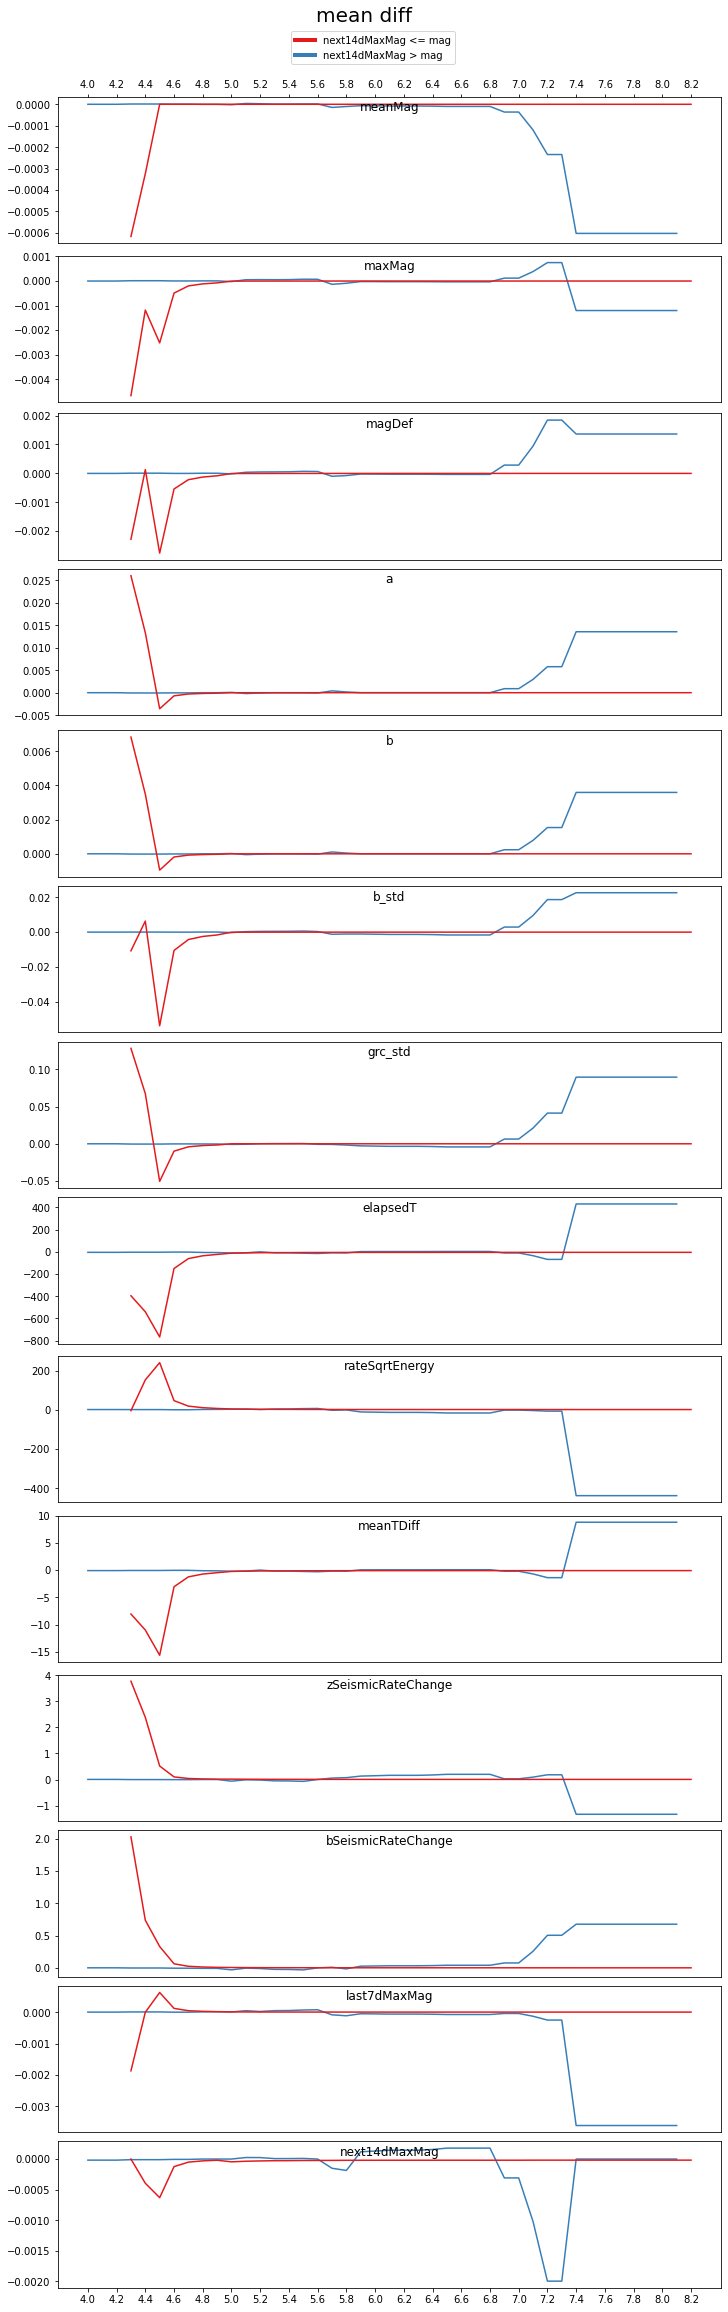

<Figure size 432x288 with 0 Axes>

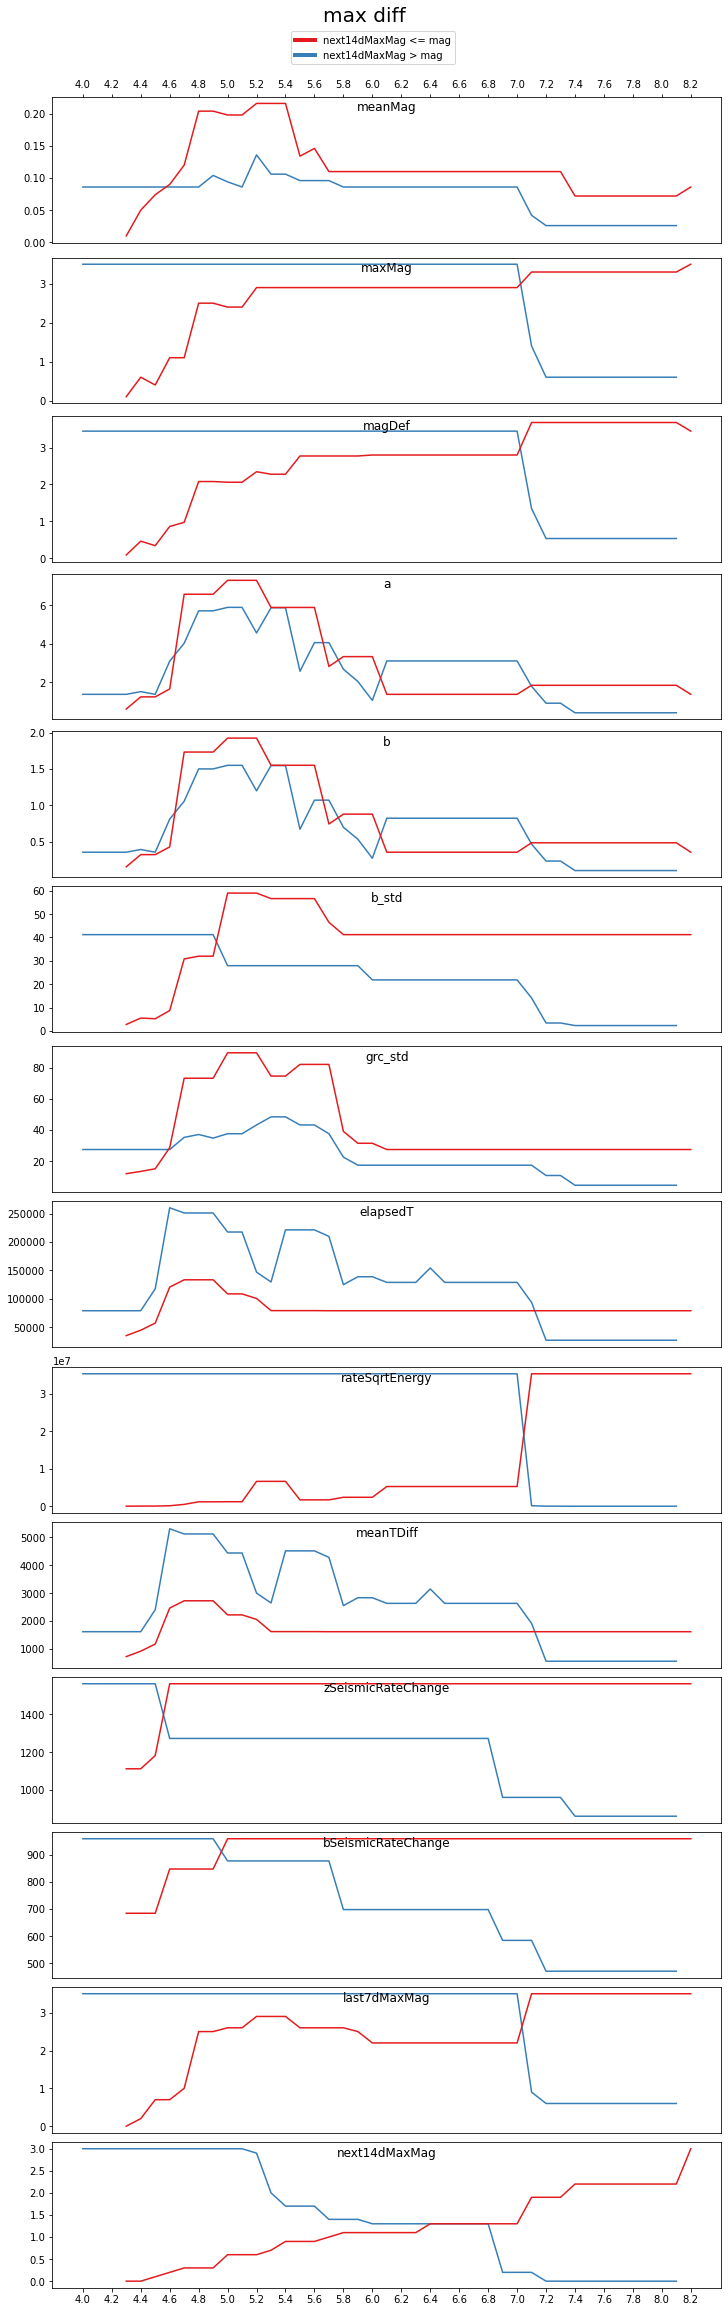

<Figure size 432x288 with 0 Axes>

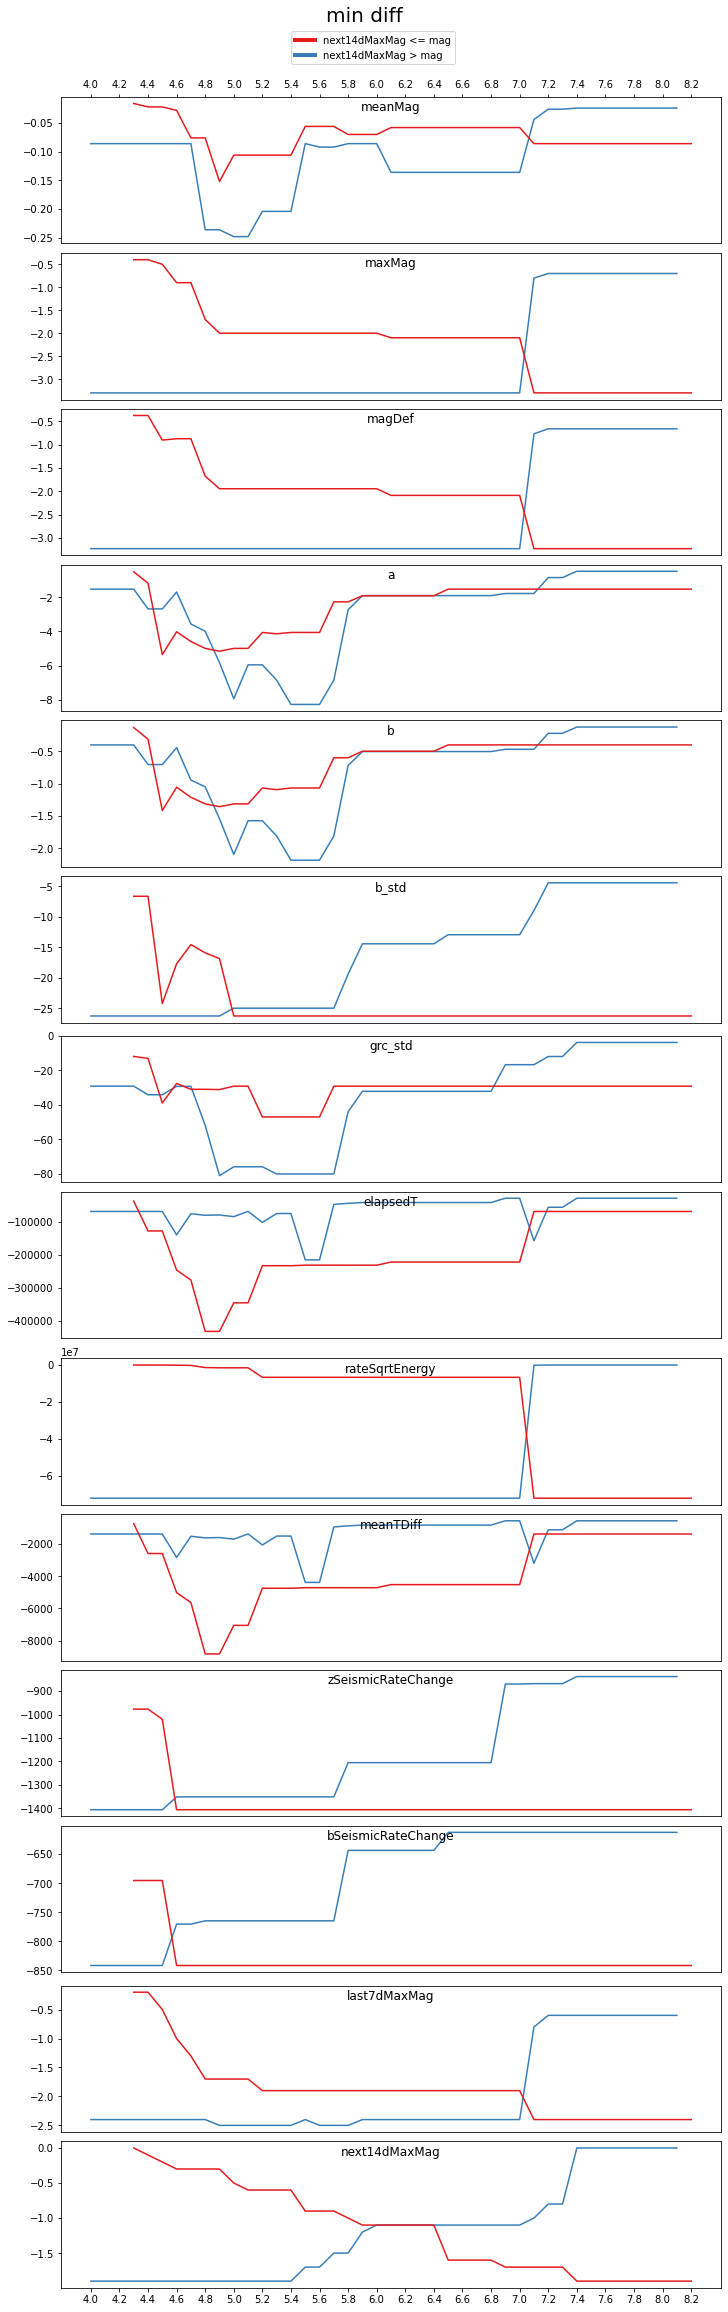

<Figure size 432x288 with 0 Axes>

In [10]:
plot_relevant_features(df_groups_to_render)